 <span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 42px;">Unicorn DB Analysis</span>

<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 30px;">Database Description</span>


<span style="font-family: 'Times New Roman', Times, serif; font-size: 18px;"> Database consists of four tables: (**dates, companies, industries, funding**)</span>

<span style="font-family: 'Times New Roman', Times, serif ; font-size: 20px;">dates:</span>

<style>
table {
    font-family: "Times New Roman", Times, serif;
}
</style>

| Column | Description |
|----------|----------|
| company_id | A unique ID for the company |
| date_joined | The date that the company became a unicorn |
| year_founded | he year that the company was founded |

<span style="font-family: 'Times New Roman', Times, serif ; font-size: 20px;">companies:</span>

<style>
table {
    font-family: "Times New Roman", Times, serif;
}
</style>

| Column | Description |
|----------|----------|
| company_id | A unique ID for the company |
| company | The name of the company |
| city | The city where the company is headquartered |
| country | The country where the company is headquartered |
| continent | The continent where the company is headquartered |

<span style="font-family: 'Times New Roman', Times, serif ; font-size: 20px;">industries:</span>

<style>
table {
    font-family: "Times New Roman", Times, serif;
}
</style>

| Column | Description |
|----------|----------|
| company_id | A unique ID for the company |
| industry | The industry that the company operates in |

<span style="font-family: 'Times New Roman', Times, serif ; font-size: 20px;">funding:</span>

<style>
table {
    font-family: "Times New Roman", Times, serif;
}
</style>

| Column | Description |
|----------|----------|
| company_id | A unique ID for the company |
| valuation | Company value in US dollars |
| funding | The amount of funding raised in US dollars |
| select_investors | A list of key investors in the company |

<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 25px;">Tables links:</span>,
<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 20px;">[dates](https://github.com/omar25599/SQL-Projects/blob/main/dates.csv)</span>, 
<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 20px;">[companies](https://github.com/omar25599/SQL-Projects/blob/main/companies.csv)</span>, 
<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 20px;">[industries](https://github.com/omar25599/SQL-Projects/blob/main/industries.csv)</span>, 
<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 20px;">[funding](https://github.com/omar25599/SQL-Projects/blob/main/funding.csv)</span>


<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 25px;">Tables Creation</span>

In [ ]:
--dates_table
CREATE TABLE dates (
    company_id INT,
    date_joined DATE,
    year_founded INT
);
--Importing Data
COPY dates FROM 'E:\dates.csv' DELIMITER ',' CSV HEADER;
------------------------------------------------------------------
--companies_table
CREATE TABLE companies (
    company_id INT,
    company VARCHAR(60),
    city VARCHAR(60),
    country VARCHAR(60),
    continent VARCHAR(60)
);
--Importing Data
COPY companies FROM 'E:\companies.csv' DELIMITER ',' CSV HEADER;
------------------------------------------------------------------
--industries_table
CREATE TABLE industries (
    company_id INT,
    industry VARCHAR(90)
);
--Importing Data
COPY industries FROM 'E:\industries.csv' DELIMITER ',' CSV HEADER;
------------------------------------------------------------------
--funding_table
CREATE TABLE funding (
    company_id INT,
    valuation BIGINT,
    funding BIGINT,
    select_investors VARCHAR(100)
);
--Importing Data
COPY funding FROM 'E:\funding.csv' DELIMITER ',' CSV HEADER;

<span style="font-family: 'Times New Roman', Times, serif ; font-size: 20px;">by running a bunch of simple queries this information discovered about the DB:</span>

<span style="font-family: 'Times New Roman', Times, serif; font-size: 18px;"> Database consists of four tables: (**dates, companies, industries, funding**)</span>

<span style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">1- Database contains data of unicorn companies joined from (**2007-07-02 to 2022-04-05**)</span>

<span style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">2- Valuations are between **1 bil to 180 bil of dollars**</span>

<span style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">3- Fundings are between **1 bil to 14 bil of dollars**</span>

<span style="font-family: 'Times New Roman', Times, serif; font-size: 18px;">4- searching for NULL values to be sure there's no missing values i've examined every table separately</span>


In [ ]:
SELECT COUNT(*)
FROM dates
LEFT JOIN funding
USING(company_id)
LEFT JOIN industries
USING(company_id)
LEFT JOIN companies
USING(company_id)
WHERE company_id IS NULL OR date_joined IS NULL OR year_founded IS NULL OR valuation IS NULL OR funding IS NULL OR select_investors IS NULL OR industry IS NULL OR company IS NULL OR city IS NULL OR country IS NULL OR continent IS NULL

<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 25px;">Objective</span>


<span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">Identify the three best-performing industries based on the number of new unicorns in each year of 2019, 2020, and 2021</span>

<span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">From those industries (1), you will need to find the number of unicorns within these industries (2), the year that they became a unicorn (3), and their average valuation, converted to billions of dollars and rounded to two decimal places (4).</span>

<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 20px;">Solution</span>

In [ ]:
WITH unicorn_2019 AS (
	SELECT industry, EXTRACT(YEAR FROM date_joined) AS year, COUNT(*) AS num_unicorns, 
	ROUND(AVG(valuation) / 1000000000, 2) AS average_valuation_billions
	FROM dates
	INNER JOIN funding USING(company_id)
	INNER JOIN industries USING(company_id)
	INNER JOIN companies USING(company_id)
	WHERE EXTRACT(YEAR FROM date_joined) = 2019
	GROUP BY industry, year
	ORDER BY num_unicorns DESC
	LIMIT 3
),
unicorn_2020 AS (
	SELECT industry, EXTRACT(YEAR FROM date_joined) AS year, COUNT(*) AS num_unicorns, 
	ROUND(AVG(valuation) / 1000000000, 2) AS average_valuation_billions
	FROM funding
	INNER JOIN dates USING(company_id)
	INNER JOIN industries USING(company_id)
	INNER JOIN companies USING(company_id)
	WHERE EXTRACT(YEAR FROM date_joined) = 2020
	GROUP BY industry, year
	ORDER BY num_unicorns DESC
	LIMIT 3
),
unicorn_2021 AS (
	SELECT industry, EXTRACT(YEAR FROM date_joined) AS year, COUNT(*) AS num_unicorns, 
	ROUND(AVG(valuation) / 1000000000, 2) AS average_valuation_billions
	FROM funding
	INNER JOIN dates USING(company_id)
	INNER JOIN industries USING(company_id)
	INNER JOIN companies USING(company_id)
	WHERE EXTRACT(YEAR FROM date_joined) = 2021
	GROUP BY industry, year
	ORDER BY num_unicorns DESC
	LIMIT 3
)
SELECT industry, year, num_unicorns, average_valuation_billions
FROM unicorn_2019
UNION
SELECT industry, year, num_unicorns, average_valuation_billions
FROM unicorn_2020
UNION
SELECT industry, year, num_unicorns, average_valuation_billions
FROM unicorn_2021
ORDER BY year DESC, num_unicorns DESC;

<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 20px;">Output</span>
<style>
table {
    font-family: "Times New Roman", Times, serif;
}
</style>

| industry | year | num_unicorns | average_valuation_billions |
|----------|----------|----------|----------|
| Fintech | 2021 | 138 | 2.75 |
| Internet software & services | 2021 | 119 | 2.15 |
| E-commerce & direct-to-consumer | 2021 | 47 | 2.47 |
| Internet software & services | 2020 | 20 | 4.35 |
| E-commerce & direct-to-consumer | 2020 | 16 | 4 |
| Fintech | 2020 | 15 | 4.33 |
| Fintech | 2019 | 20 | 6.8 |
| Artificial intelligence | 2019 | 14 | 4.5 |
| Internet software & services | 2019 | 13 | 4.23 |


<span style="font-family: 'Times New Roman', Times, serif; font-weight: bold; font-size: 20px;">Solution Visualization using Power Bi</span>

<span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">Filtering for 2019 only</span>

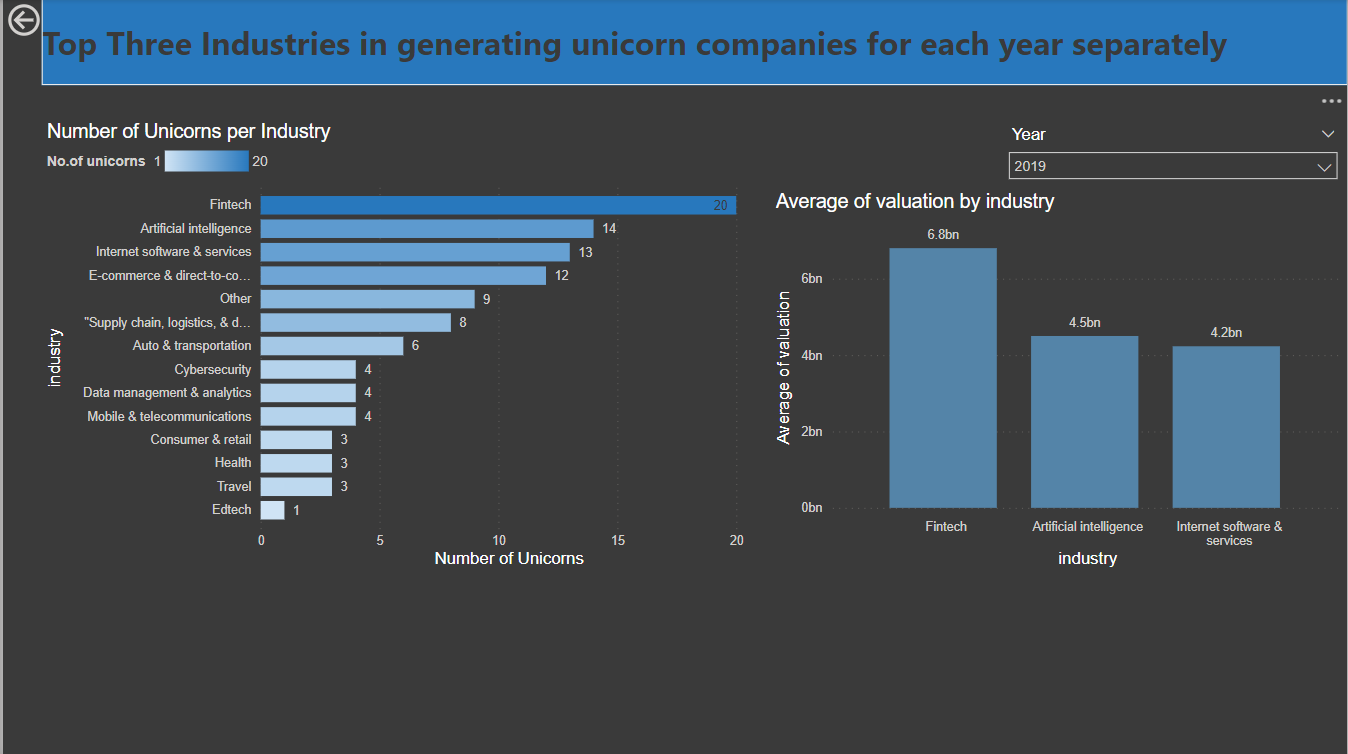

<span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">Filtering for 2020 only</span>

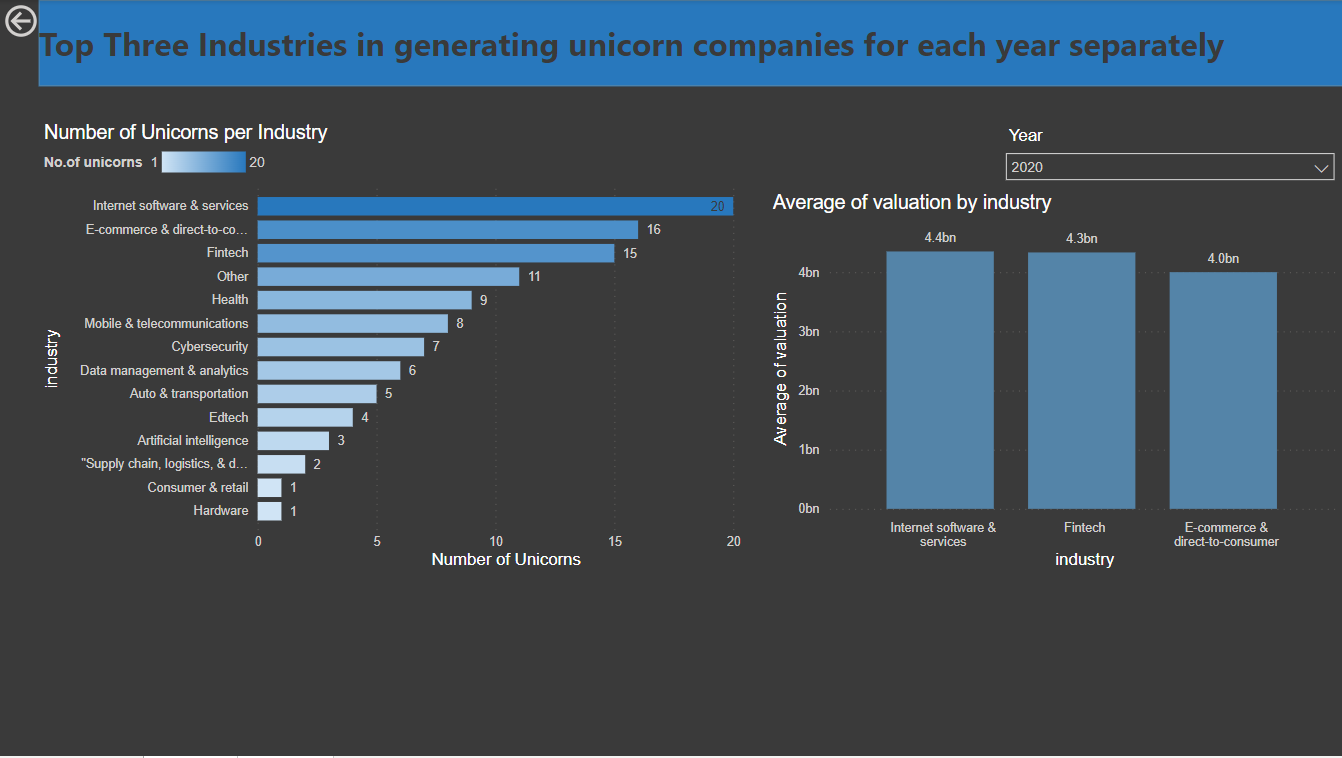

<span style="font-family: 'Times New Roman', Times, serif; font-size: 20px;">Filtering for 2021 only</span>

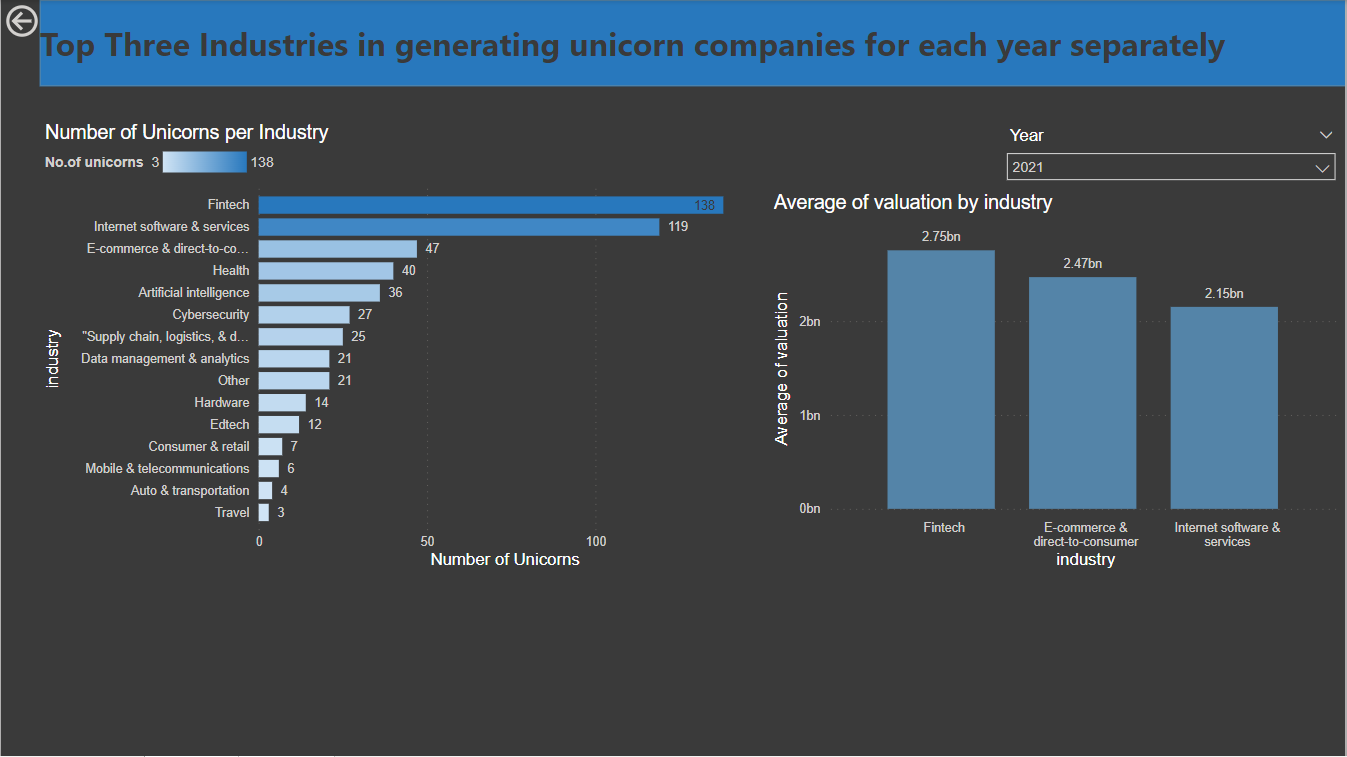